<a href="https://colab.research.google.com/github/ccc-frankfurt/Practical_ML_SS21/blob/main/week11/DQN_CartPole.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is based on coursera's Practical RL course by National Research University Higher School of Economics, https://www.coursera.org/learn/practical-rl/home/welcome

We will make a DQN-Learning agent to solve OpenAI Gym's CartPole problem.

Q-Learning update equations:


*   tabular: $$ Q(s,a) := (1 - \alpha) \cdot Q(s,a) + \alpha \cdot (r(s,a) + \gamma \cdot V(s')) \\ = Q(s,a) + \alpha \cdot (r(s,a) + \gamma \cdot V(s') - Q(s,a))$$
*    DQN: $$ L = { 1 \over N} \sum_i (Q_{\theta}(s,a) - [r(s,a) + \gamma \cdot max_{a'} Q_{-}(s', a')]) ^2 $$

In [ ]:
from collections import defaultdict
import random, math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

import torch
import torch.nn as nn
import torch.optim as optim

manualSeed = 999
print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)

In [ ]:
#XVFB will be launched if you run on a server
import os
if os.environ.get("DISPLAY") is not str or len(os.environ.get("DISPLAY"))==0:
    #!bash ../xvfb start
    %env DISPLAY=:1

env: DISPLAY=:1


In [ ]:
!apt-get -qq -y install xvfb freeglut3-dev cmake swig ffmpeg> /dev/null 2>&1
!pip install pyvirtualdisplay

from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()
%matplotlib inline

xdpyinfo was not found, X start can not be checked! Please install xdpyinfo!


2
1
Box(4,)
state:
[-0.01130247 -0.03074488 -0.02707483 -0.00317015]
4


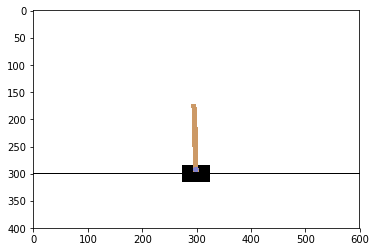

In [ ]:
import gym

env = gym.make("CartPole-v0").env
s = env.reset()

n_actions = env.action_space.n
state_dim = env.observation_space.shape[0]

print(n_actions)
print(env.action_space.sample())
# continuous (!) valued observations: Cart Position, Cart Velocity, Pole Angle, Pole Velocity at Tip
print(env.observation_space)
print('state:')
print(s)
print(state_dim)
plt.imshow(env.render('rgb_array'))

In [ ]:
class DQNAgent:
    def __init__(self, state_dim, n_actions, epsilon=0, device='cuda'):
        """A simple DQN agent"""
        
                         
        # Create a network for approximate q-learning:
        # what is the input dimension?
        # Linear(128), followed by RELU activation
        # Linear(128), followed by RELU activation
        # Last linear output layer: what should be the number of units?
        self.network = nn.Sequential(//TODO).to(device)
            
        self.epsilon = epsilon
        self.device = device
        
    def get_qvalues(self, state_t):
        return self.network(state_t)
    
    def sample_action(self, qvalues):
        """Pick actions given qvalues. Uses epsilon-greedy exploration strategy. """
        epsilon = self.epsilon
        batch_size, n_actions = qvalues.shape
        # choose random actions with np.random.choice
        # there have to be batch_size of them - one for every batch instance
        random_actions = //TODO
        # for every batch instance calculate the index of the maximum qvalue
        # hint: use the axis
        best_actions = //TODO
        # with probability epsilon should explore is 1 and else 0 for every batch instance
        # this is a mask we will use in np.where to select
        should_explore = //TODO
        # take random_actions is should_explore is 1 and best_actions else
        return np.where(should_explore, random_actions, best_actions)
    
    def get_action(self, state_t):
        # since in our case we learn on 1 sample only, we put the state into list to make batch_size=1
        state_pt = torch.Tensor([state_t]).float().to(self.device)
        qvalues = self.get_qvalues(state_pt).cpu().detach().numpy()
        
        # sample an action for the qvalues
        # sample_action returns a list, so we take the first element, because our batch_size=1
        return //TODO
    
    def update(self, s, a, r, next_s, done):
        self.optimizer.zero_grad()
        
        loss = self.loss_function([s],[a],[r],[next_s],[done])
        
        # backpropagate the loss and make an optimizer step
        //TODO
        
    def loss_function(self, states, actions, rewards, next_states, is_done):
        states_tmp = torch.Tensor(states).float().to(self.device)
        actions_tmp = np.array(actions) # assure its an array and not a list
        rewards_tmp = torch.Tensor(rewards).float().to(self.device)
        next_states_tmp = torch.Tensor(next_states).float().to(self.device)
        is_done_tmp = torch.Tensor(is_done).float().to(self.device)
        
        is_not_done = 1. - is_done_tmp
        gamma = 0.99

        """Take q-values for actions agent just took"""
        # get agent's qvalues for the states
        current_qvalues = //TODO
        
        # Create a one-hot target encoding
        # 1. use numpy tp create an empty one-hot matrix of dimensions (batch_size, n_actions)
        one_hot_actions = //TODO

        # 2. set target idx to 1
        //TODO
        # 3. convert to torch.Tensor
        one_hot_actions = torch.Tensor(one_hot_actions).float().to(self.device)
        
        # for every batch instance, get the qvalue for the chosen action
        # hint: use one_hot_actions and current_q_values, do not forget to set keepdim=True
        current_action_qvalues = //TODO

        # compute q-values for NEXT states
        # hint: use next_states_ph
        next_qvalues_target = //TODO

        # compute state values by taking max over next_qvalues_target for all actions
        # hint: use next_qvalues_target and do not forget to set keepdim=True
        next_state_values_target,_ = //TODO

        # compute Q_reference(s,a) as per r + gamma*v_next*is_not_done
        # ATTENTION: think about what v_next is
        reference_qvalues = //TODO
        # stop gradients of reference_qvalues
        reference_qvalues = reference_qvalues.detach()

        # Define loss function for sgd.
        td_loss = //TODO
        td_loss = torch.mean(td_loss)
        
        return td_loss
        
    def set_optimizer(self):
        
        self.optimizer = optim.Adam(self.network.parameters(), lr=1e-4)

In [ ]:
agent = DQNAgent(state_dim, n_actions, epsilon=0.5, device='cuda')
print(agent.network)

Sequential(
  (0): Linear(in_features=4, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=2, bias=True)
)


In [ ]:
# since it is an NN agent, we need to set an optimizer
agent.set_optimizer()

In [ ]:
# update at each train step
def play_and_train(env,agent,t_max=1000, train=True):
    """
    This function should 
    - run a full game, actions given by agent's e-greedy policy
    - train agent using agent.update(...) whenever it is possible
    - return total reward
    """
    total_reward = 0.0
    s = env.reset()
    
    for t in range(t_max):
        # get agent to pick action given state s.
        //TODO
        
        # get next_state, reward etc.
        //TODO
        
        if train:
            # train (update) agent for state s
            //TODO
        
        s = next_s
        total_reward +=r
        if done: break
        
    return total_reward

* __ mean reward__ is the average reward per game. For a correct implementation it may stay low for some 10 epochs, then start growing while oscilating insanely and converges by ~50-100 steps depending on the network architecture. 
* If it never reaches target score by the end of for loop, try increasing the number of hidden neurons or look at the epsilon.
* __ epsilon__ - agent's willingness to explore. If you see that agent's already at < 0.01 epsilon before it's is at least 200, just reset it back to 0.1 - 0.5.
* you may also try to tweak the learning rate of your optimizer

In [ ]:
for i in range(100):
    session_rewards = [play_and_train(env, agent, train=True) for _ in range(100)]
    print("epoch #{}\tmean reward = {:.3f}\tepsilon = {:.3f}".format(i, np.mean(session_rewards), agent.epsilon))
    
    agent.epsilon *= 0.99
    assert agent.epsilon >= 1e-4, "Make sure epsilon is always nonzero during training"
    
    if np.mean(session_rewards) > 300:
        print ("You Win!")
        break

epoch #0	mean reward = 13.170	epsilon = 0.500
epoch #1	mean reward = 15.110	epsilon = 0.495
epoch #2	mean reward = 13.610	epsilon = 0.490
epoch #3	mean reward = 15.310	epsilon = 0.485
epoch #4	mean reward = 14.400	epsilon = 0.480
epoch #5	mean reward = 26.970	epsilon = 0.475
epoch #6	mean reward = 36.060	epsilon = 0.471
epoch #7	mean reward = 43.330	epsilon = 0.466
epoch #8	mean reward = 49.570	epsilon = 0.461
epoch #9	mean reward = 51.350	epsilon = 0.457
epoch #10	mean reward = 68.270	epsilon = 0.452
epoch #11	mean reward = 100.800	epsilon = 0.448
epoch #12	mean reward = 117.500	epsilon = 0.443
epoch #13	mean reward = 140.780	epsilon = 0.439
epoch #14	mean reward = 166.930	epsilon = 0.434
epoch #15	mean reward = 165.140	epsilon = 0.430
epoch #16	mean reward = 211.530	epsilon = 0.426
epoch #17	mean reward = 195.120	epsilon = 0.421
epoch #18	mean reward = 228.830	epsilon = 0.417
epoch #19	mean reward = 251.080	epsilon = 0.413
epoch #20	mean reward = 259.030	epsilon = 0.409
epoch #21	mea

In [ ]:
# record sessions
import gym.wrappers
env = gym.wrappers.Monitor(gym.make("CartPole-v0"),directory="videos",force=True)
# set epsilon to 0, since for testing no exploration is needed
agent.epsilon = 0
sessions = [play_and_train(env, agent, train=False) for _ in range(1)]
env.close()

In [ ]:
# show video
# the visualization function from 
# https://star-ai.github.io/Rendering-OpenAi-Gym-in-Colaboratory/

from IPython.display import HTML
from IPython import display as ipythondisplay
import io
import base64

video_names = list(filter(lambda s:s.endswith(".mp4"),os.listdir("./videos/")))

video = io.open("./videos/"+video_names[-1], 'r+b').read()
encoded = base64.b64encode(video)
ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))